In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
IMG_SIZE=224
BATCH_SIZE=32

In [6]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 407 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 507 images belonging to 3 classes.


In [7]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(68,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(train_generator,validation_data=test_generator,epochs=5)

Epoch 1/5
13/13 [==============================] - 140s 11s/step - loss: 1.5834 - accuracy: 0.4226 - val_loss: 0.9969 - val_accuracy: 0.5385
Epoch 2/5
13/13 [==============================] - 94s 7s/step - loss: 0.8369 - accuracy: 0.6290 - val_loss: 0.6114 - val_accuracy: 0.7613
Epoch 3/5
13/13 [==============================] - 91s 7s/step - loss: 0.5226 - accuracy: 0.8059 - val_loss: 0.4612 - val_accuracy: 0.7850
Epoch 4/5
13/13 [==============================] - 92s 7s/step - loss: 0.3294 - accuracy: 0.8796 - val_loss: 0.1862 - val_accuracy: 0.9448
Epoch 5/5
13/13 [==============================] - 91s 7s/step - loss: 0.1970 - accuracy: 0.9337 - val_loss: 0.1577 - val_accuracy: 0.9389


In [10]:
model.save("FRUITS.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 141ms/step
[[6.0407615e-06 9.9998355e-01 1.0324639e-05]]
1/1 [==============================] - 0s 46ms/step
predicted_class  grapes


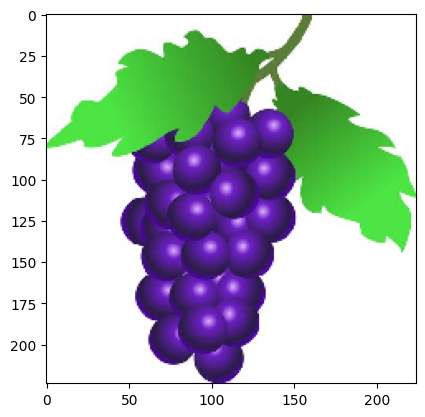

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model=load_model('/content/drive/MyDrive/Dataset/FRUITS.h5')
test_image_path='/content/drive/MyDrive/Dataset/banana fruit/grapes fruit/003_d34b8d39.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255.
plt.imshow(img)
prediction=model.predict(img_array)
print(prediction)
classes = { 0:"banana",1:"grapes",2:"strawberry"}
prediction=model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
print("predicted_class ",classes[predicted_class_index])
#print(f"Predicted class: {predicted_class}")